# ADA / Applied Data Analysis
<h2 style="color:#a8a8a8">Homework 5 - Taming text<br>
Aimée Montero, Alfonso Peterssen, Cyriaque Brousse</h2>

## Background
In this homework you will explore a relatively large corpus of emails released in public during the
[Hillary Clinton email controversy](https://en.wikipedia.org/wiki/Hillary_Clinton_email_controversy).
You can find the corpus in the `hillary-clinton-emails` directory of this repository, while more detailed information 
about the [schema is available here](https://www.kaggle.com/kaggle/hillary-clinton-emails).

## Assignment
1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.<br><br>

2. Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?<br><br>

3. Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.<br><br>

4. *BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.

## Part 1 - Word clouds

In [109]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [110]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [172]:
data = pd.read_csv("./hillary-clinton-emails/Emails.csv")
data.head(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [173]:
mails = pd.DataFrame(data['ExtractedSubject'].fillna('') + data['ExtractedBodyText'].fillna(''))
mails.head(5)

,0
0,FW: Wow
1,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Re: Chris StevensThx
3,FVV: Cairo Condemnation - Final
4,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


In [174]:
mails.replace('', np.nan, inplace=True)

In [175]:
mails.count() / len(mails)

0    0.953682
dtype: float64

In [176]:
mails = mails.dropna()
mails.head(5)

,0
0,FW: Wow
1,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Re: Chris StevensThx
3,FVV: Cairo Condemnation - Final
4,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


In [177]:
d = mails.apply(lambda x : ' '.join(x), axis=0 )
raw_mails = d.get(0)

In [178]:
wordcloud = WordCloud(max_font_size=40).generate(raw_mails)

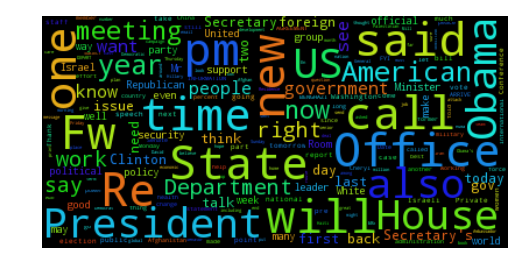

In [118]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [188]:
from nltk import word_tokenize
import string

In [189]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [190]:
for c in string.punctuation :
    if(c in '\'.') :
        raw_mails = raw_mails.replace(c, '')
    else :
        raw_mails = raw_mails.replace(c, ' ')

In [191]:
tokens = word_tokenize(raw_mails)
len(tokens)

640226

In [192]:
from nltk.corpus import stopwords

In [193]:
stop = stopwords.words('english') + ['pm', 'am', 're', 'fw', 'fvv']
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [194]:
words_list = [token for token in tokens if token.lower() not in stop and len(token) > 1]
len(words_list)

370624

In [197]:
words_list = [word.lower() if word != 'US' else word  for word in words_list]
words_list

['wow',
 'b6',
 'thursday',
 'march',
 '2011',
 '45',
 'latest',
 'syria',
 'aiding',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311docx',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311docx',
 'march',
 '2011',
 'hillary',
 'chris',
 'stevensthx',
 'cairo',
 'condemnation',
 'final',
 'hrod17',
 'clintonemailcom',
 'friday',
 'march',
 '11',
 '2011',
 '36',
 'huma',
 'abedin',
 'latest',
 'syria',
 'aiding',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311docx',
 'pis',
 'print',
 'meet',
 'right',
 'wing',
 'extremist',
 'behind',
 'anti',
 'muslim',
 'film',
 'sparked',
 'deadly',
 'riotspis',
 'print',
 'hrod17',
 'clintonernailcom',
 'wednesday',
 'september',
 '12',
 '2012',
 '11',
 '°russorv',
 'stategov',
 'meet',
 'right',
 'wing',
 'extremist',
 'behind',
 'anti',
 'fvluslim',
 'film',
 'sparked',
 'deadly',
 'riots',
 'meat',
 'sent',
 'wednesday',
 'september',
 '12',
 '2012',
 '01',
 '00',
 '11',
 'subject'

In [126]:
wnl = nltk.WordNetLemmatizer()
lemmatised_words = [wnl.lemmatize(token) for token in words_list]
len(lemmatised_words)

370624

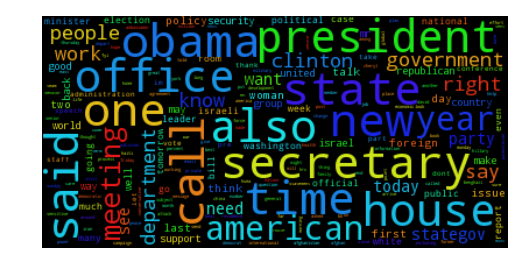

In [127]:
lemmatised_text = ' '.join(lemmatised_words)
wordcloud = WordCloud(max_font_size=40).generate(lemmatised_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [128]:
porter = nltk.PorterStemmer()
stemmed_words = [porter.stem(token) for token in words_list]
len(stemmed_words)

370624

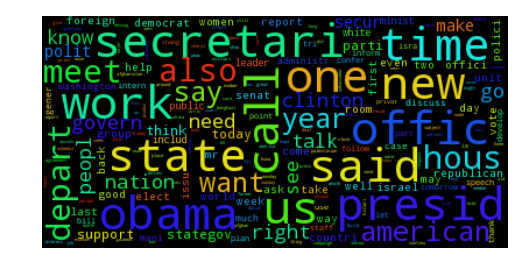

In [129]:
stemmed_text = ' '.join(stemmed_words)
wordcloud = WordCloud(max_font_size=40).generate(stemmed_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 2nd Part

In [162]:
import pycountry
import difflib

In [135]:
pycountry.countries

In [159]:
country_names = [ [x.name.lower(), x.alpha_2.lower(), x.alpha_3.lower()]  for x in pycountry.countries]

In [160]:
country_names = [item for countries_sublist in country_names for item in countries_sublist]

In [171]:
matching_countries = [difflib.get_close_matches( word, country_names) for word in lemmatised_words]
matching_countries

[[],
 [],
 [],
 ['mar', 'mac', 'macao'],
 [],
 [],
 ['est', 'lesotho'],
 ['syr', 'serbia', 'austria'],
 ['idn'],
 [],
 ['si', 'sd', 'id'],
 ['hr', 'hrv', 'grc'],
 ['mo', 'mm', 'me'],
 ['syr', 'serbia', 'austria'],
 ['idn'],
 ['libya', 'lby', 'liberia'],
 [],
 ['hr', 'hrv', 'grc'],
 ['mo', 'mm', 'me'],
 ['syr', 'serbia', 'austria'],
 ['idn'],
 ['libya', 'lby', 'liberia'],
 [],
 ['mar', 'mac', 'macao'],
 [],
 [],
 ['cri', 'china', 'chile'],
 [],
 ['pitcairn', 'cameroon', 'macao'],
 [],
 ['fin', 'finland', 'nepal'],
 [],
 [],
 ['fra'],
 ['mar', 'mac', 'macao'],
 [],
 [],
 [],
 ['um', 'ua', 'ma'],
 ['benin', 'ben', 'bdi'],
 ['est', 'lesotho'],
 ['syr', 'serbia', 'austria'],
 ['idn'],
 [],
 ['si', 'sd', 'id'],
 ['hr', 'hrv', 'grc'],
 ['mo', 'mm', 'me'],
 ['syr', 'serbia', 'austria'],
 ['idn'],
 ['libya', 'lby', 'liberia'],
 [],
 ['pri'],
 ['prt', 'pri', 'spain'],
 ['mt', 'me', 'et'],
 [],
 ['ng', 'in'],
 [],
 ['benin', 'ind', 'hnd'],
 ['ni', 'haiti', 'at'],
 ['mus', 'mli', 'mali'],
 ['im', 

In [170]:
lemmatised_words

['wow',
 'b6',
 'thursday',
 'march',
 '2011',
 '45',
 'latest',
 'syria',
 'aiding',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311docx',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311docx',
 'march',
 '2011',
 'hillary',
 'chris',
 'stevensthx',
 'cairo',
 'condemnation',
 'final',
 'hrod17',
 'clintonemailcom',
 'friday',
 'march',
 '11',
 '2011',
 '36',
 'huma',
 'abedin',
 'latest',
 'syria',
 'aiding',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311docx',
 'pi',
 'print',
 'meet',
 'right',
 'wing',
 'extremist',
 'behind',
 'anti',
 'muslim',
 'film',
 'sparked',
 'deadly',
 'riotspis',
 'print',
 'hrod17',
 'clintonernailcom',
 'wednesday',
 'september',
 '12',
 '2012',
 '11',
 '°russorv',
 'stategov',
 'meet',
 'right',
 'wing',
 'extremist',
 'behind',
 'anti',
 'fvluslim',
 'film',
 'sparked',
 'deadly',
 'riot',
 'meat',
 'sent',
 'wednesday',
 'september',
 '12',
 '2012',
 '01',
 '00',
 '11',
 'subject',
